In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# DATA CLEANING & COLLECTION

In [2]:
df = pd.read_csv("flight_train.csv.zip", index_col = 0)  #reading in the csv file into a Pandas Data Frame
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [3]:
df.shape   #Wanted to see size of data set

(103904, 24)

In [4]:
df[df['id'] == 110028]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [5]:
df2 = pd.read_csv("flight_test.csv.zip", index_col = 0)  #reading in the csv file into a Pandas Data Frame
df2.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [6]:
df2.shape

(25976, 24)

In [7]:
df.isnull().sum()  #checked to see which columns had null values and how many of those

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df2.isnull().sum()  #checked to see which columns had null values and how many of those

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [9]:
df.dropna(subset = ["Arrival Delay in Minutes"], how = "any", inplace = True)  #removing all null values
df.shape

(103594, 24)

In [10]:
df.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

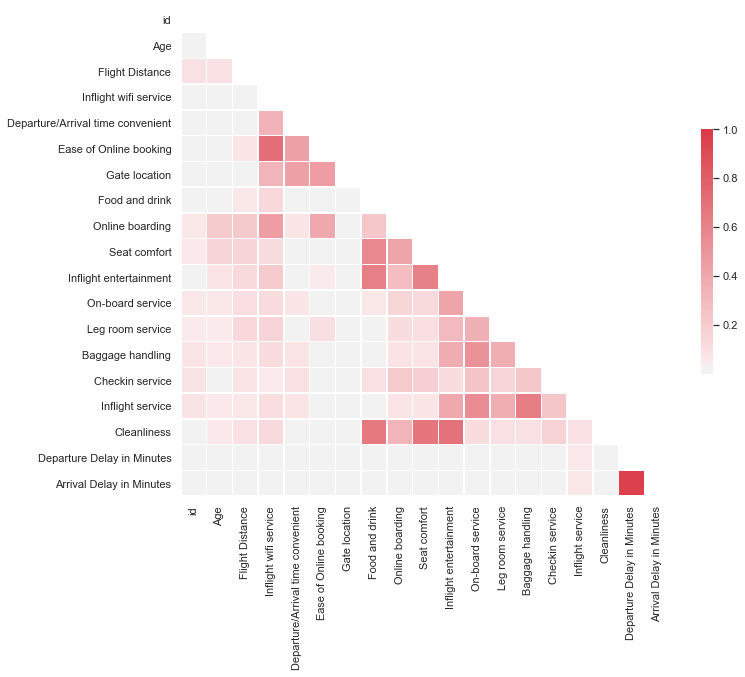

In [11]:
sns.set(style="white")  #using a heat map to display the visuals for the correlations in the dataset
# Compute the correlation matrix
corr = np.abs(df.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

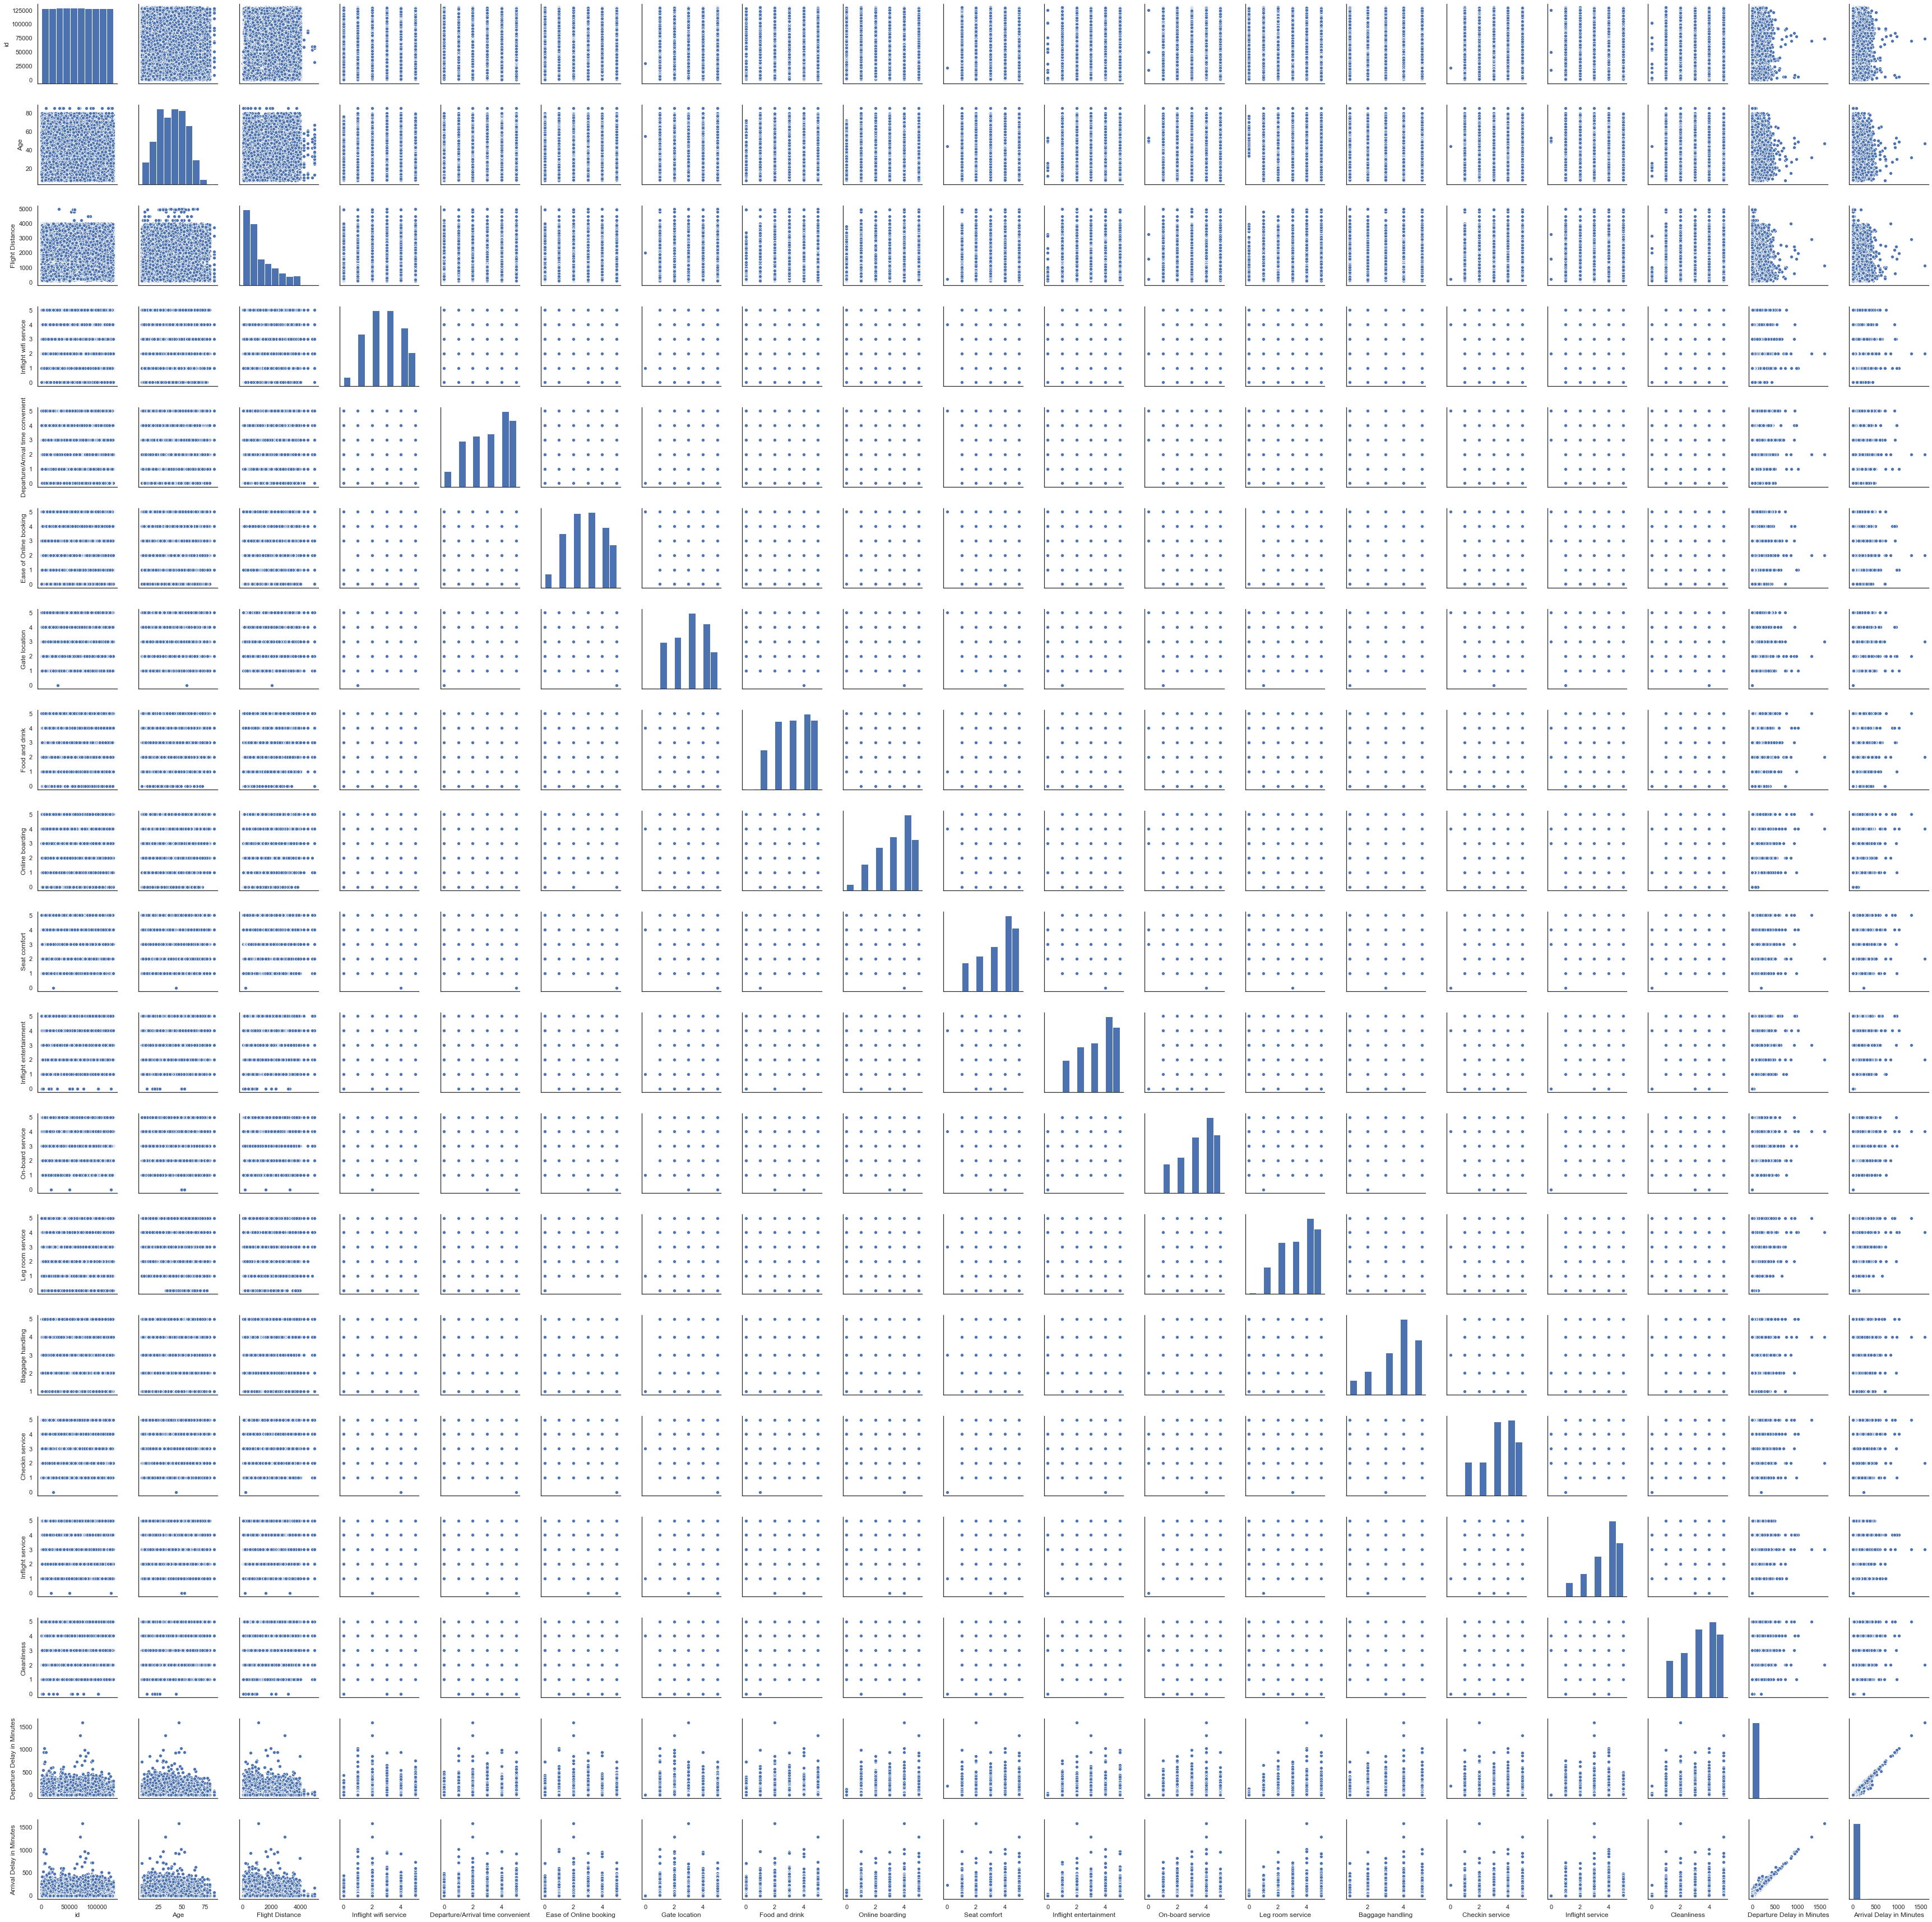

In [12]:
sns.pairplot(df)  #calling a pair plot to see the relationship between the variables in the dataset

In [13]:
df_corr_matrix = df.corr() 
df_corr_matrix  #computed a correlation matrix for data set to see if it suggested that any features were collinear

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900


In [14]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# FEATURE ENGINEERING

In [15]:
df.Gender.value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [16]:
df["Customer Type"].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [17]:
df["Type of Travel"].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [18]:
df["Class"].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [19]:
# df["Gender"].replace({"Male": 1, "Female": 2}, inplace = True)
#changed categorical values into ordinal

In [20]:
# df["Customer Type"].replace({"Loyal Customer": 1, "disloyal Customer": 2}, inplace = True)
#changed categorical values into ordinal

In [21]:
# df["Type of Travel"].replace({"Business travel": 1, "Personal Travel": 2}, inplace = True)
#changed categorical values into ordinal

In [22]:
# df["Class"].replace({"Business": 1, "Eco": 2, "Eco Plus": 3}, inplace = True)
#changed categorical values into ordinal

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
len(df.columns) #checked to see length of columns

24

In [25]:
mf = pd.get_dummies(df.Gender).iloc[:, 1:]  #creating dummies for categorical variables
ld = pd.get_dummies(df["Customer Type"]).iloc[:, 1:]
tt = pd.get_dummies(df["Type of Travel"]).iloc[:, 1:]
c = pd.get_dummies(df.Class).iloc[:, 1:]
df = pd.concat([df, mf, ld, tt, c], axis = 1)  #concatting dummies into original Data Frame

In [26]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,0


In [27]:
df["Flight Distance"].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [28]:
bins = [31, 415, 843, 1744, 4984]  #defining bins

In [29]:
review_bins = ["Very Short", "Short", "Long", "Very Long"]  #labeling the bins

In [30]:
df["Flight Category"] = pd.cut(df["Flight Distance"], bins, labels = review_bins) #making a new column with binned values

In [31]:
df.head()  #checked to see new column that was created from binning

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,Flight Category
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1,Short
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0,Very Short
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,0,Long
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0,Short
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,0,Very Short


In [32]:
df.Age.describe()

count    103594.000000
mean         39.380466
std          15.113125
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [33]:
binsA = [7, 19, 32, 55, 85]  #defining bins

In [34]:
review_binsA = ["Child", "Young Adult", "Adult", "Senior"]  #labeling the bins

In [35]:
df["Age Groups"] = pd.cut(df["Age"], binsA, labels = review_binsA) #making a new column with binned values

In [36]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,Flight Category,Age Groups
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1,Short,Child
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0,Very Short,Young Adult
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,0,Long,Young Adult
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0,Short,Young Adult
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,0,Very Short,Senior


In [37]:
ag = pd.get_dummies(df["Age Groups"]).iloc[:, 1:]  #creating dummies for categorical variables
fc = pd.get_dummies(df["Flight Category"]).iloc[:, 1:]
df = pd.concat([df, ag, fc], axis = 1)  #concatting dummies into original Data Frame

In [38]:
df["Departure Delay in Minutes"].describe()  #checked to see the measures of central tendencies

count    103594.000000
mean         14.747939
std          38.116737
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [39]:
df["Arrival Delay in Minutes"].describe()  #checked to see the measures of central tendencies

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [40]:
df.drop(["Arrival Delay in Minutes"], axis = 1, inplace = True)  #got rid of this because of it's colllinearity with Departure Delay

In [41]:
df.columns  #checked to see new dataframe columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction', 'Male',
       'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus',
       'Flight Category', 'Age Groups', 'Young Adult', 'Adult', 'Senior',
       'Short', 'Long', 'Very Long'],
      dtype='object')

# HYPOTHESIS TESTING

In [42]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [43]:
#CHI2:

#1.) Seating Class vs. satisfied/disatisfied
#2.) Age Groups vs. satisfied/disatisfied
#3.) Loyal/Disloyal vs. satisfied/disatisfied 

In [44]:
#1
df_e = df[df['Class'] == 'Eco']
df_ep = df[df['Class'] == 'Eco Plus']
df_b = df[df['Class'] == 'Business']

In [46]:
df_class = pd.DataFrame(columns=['Eco', 'Eco Plus', 'Business'])

df_class['Eco'] = df_e.groupby('satisfaction')['satisfaction'].count()
df_class['Eco Plus'] = df_ep.groupby('satisfaction')['satisfaction'].count()
df_class['Business'] = df_b.groupby('satisfaction')['satisfaction'].count()

df_class.head()

,Eco,Eco Plus,Business
satisfaction,,,
neutral or dissatisfied,37922,5632,15143
satisfied,8671,1836,34390


In [47]:
stat, p, dof, expected = chi2_contingency(df_class)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=2
[[26399.88146997  4231.4149082  28065.70362183]
 [20193.11853003  3236.5850918  21467.29637817]]
probability=0.950, critical=5.991, stat=26402.222)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [48]:
#2
df_c = df[df['Age Groups'] == 'Child']
df_ya = df[df['Age Groups'] == 'Young Adult']
df_a = df[df['Age Groups'] == 'Adult']
df_s = df[df["Age Groups"] == "Senior"]

In [49]:
df_age = pd.DataFrame(columns=['Child', 'Young Adult', 'Adult', 'Senior'])

df_age['Child'] = df_c.groupby('satisfaction')['satisfaction'].count()
df_age['Young Adult'] = df_ya.groupby('satisfaction')['satisfaction'].count()
df_age['Adult'] = df_a.groupby('satisfaction')['satisfaction'].count()
df_age['Senior'] = df_s.groupby('satisfaction')['satisfaction'].count()

df_age.head()

,Child,Young Adult,Adult,Senior
satisfaction,,,,
neutral or dissatisfied,7521,16526,23975,10171
satisfied,1699,9517,26906,6719


In [50]:
stat, p, dof, expected = chi2_contingency(df_age)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=3
[[ 5207.40202263 14708.93393443 28737.29092338  9539.37311955]
 [ 4012.59797737 11334.06606557 22143.70907662  7350.62688045]]
probability=0.950, critical=7.815, stat=4787.159)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [51]:
#3
df_l = df[df['Customer Type'] == 'Loyal Customer']
df_d = df[df['Customer Type'] == 'disloyal Customer']

In [52]:
df_cust = pd.DataFrame(columns=['Loyal Customer', 'disloyal Customer'])

df_cust['Loyal Customer'] = df_l.groupby('satisfaction')['satisfaction'].count()
df_cust['disloyal Customer'] = df_d.groupby('satisfaction')['satisfaction'].count()

df_cust.head()

,Loyal Customer,disloyal Customer
satisfaction,,
neutral or dissatisfied,44249,14448
satisfied,40413,4484


In [53]:
stat, p, dof, expected = chi2_contingency(df_cust)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=1
[[47970.01191189 10726.98808811]
 [36691.98808811  8205.01191189]]
probability=0.950, critical=3.841, stat=3643.267)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


# GRAPHS/VISUALS

Text(0.5, 1.0, 'Flight')

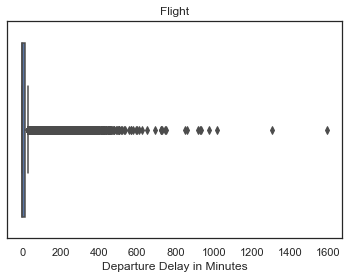

In [54]:
sns.boxplot(df["Departure Delay in Minutes"]).set_title('Flight')

In [55]:
df.drop(["Age", "Gender", "Customer Type", "Type of Travel", "Class", "Flight Distance"], axis = 1, inplace = True)

In [56]:
df.drop(["Flight Category", "Age Groups"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Flight')

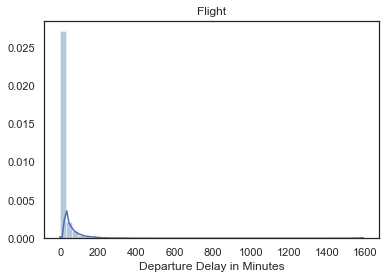

In [57]:
sns.distplot(df["Departure Delay in Minutes"]).set_title('Flight')

In [58]:
df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)
#changed categorical values into ordinal

Text(0.5, 1.0, 'Flight')

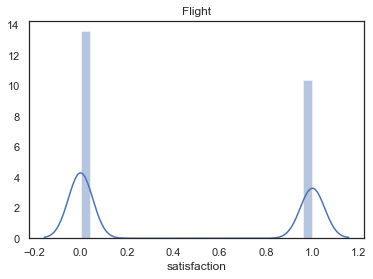

In [59]:
sns.distplot(df["satisfaction"]).set_title('Flight')

# MODELING

In [60]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')
from sklearn import metrics

In [61]:
target = df['satisfaction']
features = df.drop(['satisfaction'], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 22, test_size = 0.20)

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

In [64]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))

Training Root Mean Squared Error: 0.34583154422275275
Testing Rooot Mean Squared Error: 0.3464828237253721
R^2 Train Score: 0.5130531134895169
R^2 Test Score: 0.5107414736865219


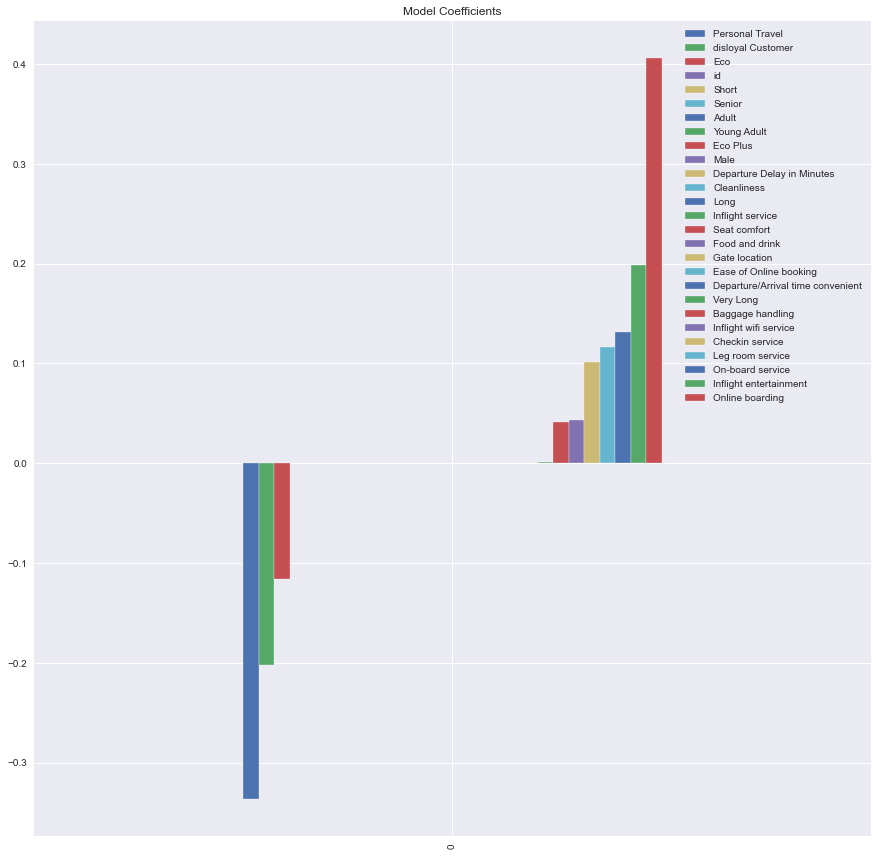

In [65]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=True, figsize=(15,15))

In [66]:
lasso_coef01

,Personal Travel,disloyal Customer,Eco,id,Short,Senior,Adult,Young Adult,Eco Plus,Male,Departure Delay in Minutes,Cleanliness,Long,Inflight service,Seat comfort,Food and drink,Gate location,Ease of Online booking,Departure/Arrival time convenient,Very Long,Baggage handling,Inflight wifi service,Checkin service,Leg room service,On-board service,Inflight entertainment,Online boarding
0,-0.336628,-0.202072,-0.115855,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.001376,0.041713,0.043367,0.101002,0.116568,0.131222,0.199073,0.406001
